# MDI220 Project 
**Student : Guilhem JAZERON**

## Load data and libraries

In [1]:
import pandas as pd
from os import path
import datetime as dt
import statistics
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

# Load file
data_path = os.getcwd()
filename = 'C_id_35_NuclearPowerAccidents2016.csv'
filepath = path.join(data_path, filename)

# Loading CSV data with pandas
if path.isfile(filepath) :
    df = pd.read_csv(filepath)
    print('File successefully loaded')
else :
    print("File not found, make sure the file is in your current repository and is named C_id_35_NuclearPowerAccidents2016.csv")

File successefully loaded


## Exercise 1
### Question 1.

In [2]:
date_format = '%m/%d/%Y'
lines_to_keep = []

# Go through all lines and keep those with a date < 3/28/1979
for d in df['Date']:
    d = dt.datetime.strptime(d, date_format)
    lines_to_keep.append(d < dt.datetime(1979, 3, 28))

# Remove undesired lines, then isolate costs Series
final_df = df[lines_to_keep]
costs = final_df['Cost (millions 2013US$)'].dropna() # removing NaN entries with dropna()
print(f'There are {len(costs)} values in the array costs')

There are 55 values in the array costs


### Question 2. a

Let $p \in (0,1)$. Let $X \sim \mathcal{N}(\mu,\sigma^2)$, which we can write as $X = \sigma \cdot Z + \mu$ with $Z \sim \mathcal{N}(0,1)$

Let's show that $F_{\theta}(\sigma  \cdot F_{(0,1)}^{-1}(p)+ \mu) = p$

We have : $$F_{\theta}(\sigma  \cdot F_{(0,1)}^{-1}(p)+ \mu) = \int_{-\infty}^{\sigma  \cdot F_{(0,1)}^{-1}(p)+ \mu} \frac{1}{\sqrt{2\pi}\sigma} \exp(-\frac{(x-\mu)^2}{2\sigma^2}) dx$$ 

Let's do the change of variables $x = \sigma \cdot z + \mu$, $dx = \sigma dz$ 

Then : $$\int_{-\infty}^{\sigma  \cdot F_{(0,1)}^{-1}(p)+ \mu} \frac{1}{\sqrt{2\pi}\sigma} \exp(-\frac{(x-\mu)^2}{2\sigma^2}) dx = \int_{-\infty}^{F_{(0,1)}^{-1}(p)} \frac{1}{\sqrt{2\pi}\sigma} \exp(-\frac{z^2}{2}) \sigma dz = \int_{-\infty}^{F_{(0,1)}^{-1}(p)} \frac{1}{\sqrt{2\pi}} \exp(-\frac{z^2}{2}) dz$$

But : $$\int_{-\infty}^{F_{(0,1)}^{-1}(p)} \frac{1}{\sqrt{2\pi}} \exp(-\frac{z^2}{2}) dz = F_{(0,1)}(F_{(0,1)}^{-1}(p))=p$$, by definition.

Then we showed that : $F_{\theta}\circ (\sigma  \cdot F_{(0,1)}^{-1}+ \mu) = id_{(0,1)}$, which exactly means that $\sigma  \cdot F_{(0,1)}^{-1}+ \mu = F_{\theta}^{-1}$ because $F_{\theta}$ is bijective.

### Question 2. b

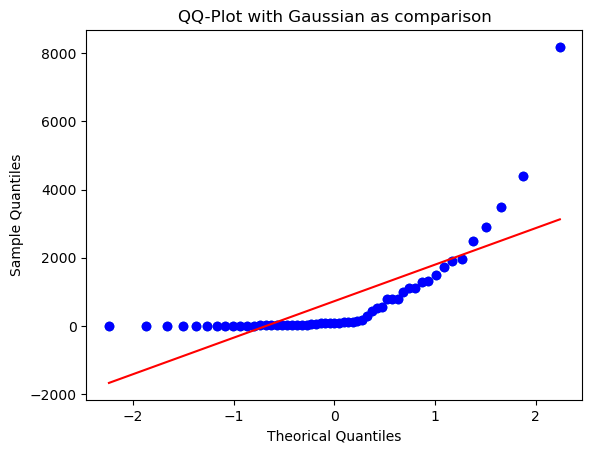

In [3]:
osm, osr = ss.probplot(costs, plot = plt)
plt.scatter(osm[0], osm[1])
plt.title("QQ-Plot with Gaussian as comparison")
plt.xlabel("Theorical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

### Question 3. a

Let $p \in (0,1)$. Let $X \sim \mathcal{Exp}(\theta)$, which we can write as $X = \frac{1}{\theta}Z $ with $Z \sim \mathcal{Exp}(1)$

Let's show that $F_{\theta}(\frac{1}{\theta}F_{1}^{-1}(p)) = p$

We have : $$F_{\theta}(\frac{1}{\theta}F_{1}^{-1}(p)) = \int_{-\infty}^{\frac{1}{\theta}F_{1}^{-1}(p)} \theta \exp(-\theta x) dx$$ 

Let's do the change of variables $x = \frac{1}{\theta}z$, $dx = \frac{1}{\theta} dz$ 

Then : $$\int_{-\infty}^{\frac{1}{\theta}F_{1}^{-1}(p)} \theta \exp(-\theta x) dx = \int_{-\infty}^{F_{1}^{-1}(p)} \theta \exp(-z) \frac{1}{\theta} dz = \int_{-\infty}^{F_{1}^{-1}(p)} \exp(-z) dz$$

But : $$\int_{-\infty}^{F_{1}^{-1}(p)} \exp(-z) dz = F_{1}(F_{1}^{-1}(p))=p$$, by definition.

Then we showed that : $F_{\theta}\circ (\frac{1}{\theta}F_{1}^{-1}(p)) = id_{(0,1)}$, which exactly means that $\frac{1}{\theta}F_{1}^{-1}= F_{\theta}^{-1}$ because $F_{\theta}$ is bijective.


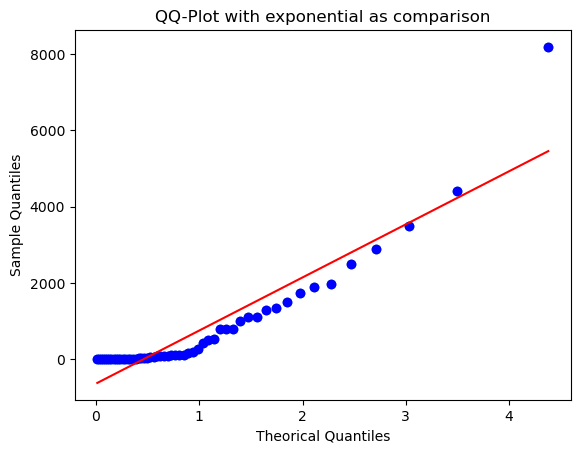

In [4]:
osm, osr = ss.probplot(costs, dist='expon', plot = plt)
plt.scatter(osm[0], osm[1])
plt.title("QQ-Plot with exponential as comparison")
plt.xlabel("Theorical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

### Question 4

We know that the QQ-plot should look like a line for the corresponding distribution (either Gaussian or Exponential). We see that the QQ-plot looks more like a line for the Exponential distribution, so we deduce that an exponential model is a better approximation for our sample costs.

## Exercise 2

### Question 1

We have : $p_{\theta}(x) = \prod_{i=1}^n \theta \exp(-\theta x_i) = \theta^n \exp(-\theta S)$ with $S = \sum_{i=1}^n x_i$

By definition, $\hat{\theta}(x) = \argmax_{\theta \in (0, +\infty)} p_{\theta}(x)$

Since $\ln$ is increasing, we can as well maximize $ln(p_{\theta}(x))$

Then : $\hat{\theta}(x) = \argmax_{\theta \in (0, +\infty)} \ln(\theta^n \exp(-\theta S))$

But : $\ln(\theta^n \exp(-\theta S)) = n \ln(\theta) - \theta S$

Hence : $\frac{\partial \ln p_{\theta}(x)}{\partial \theta} = \frac{n}{\theta} - S$

$\frac{\partial \ln p_{\theta}(x)}{\partial \theta}=0 \iff \theta = \frac{n}{S}$

So $\hat{\theta}(x) = \frac{n}{S}$

### Question 2

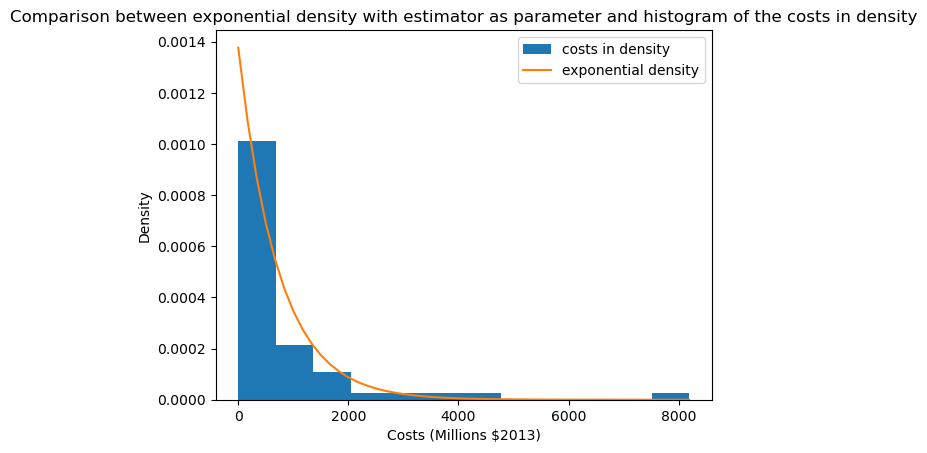

In [5]:
plt.hist(costs, range =(0, 8189), bins = 12, density=True, label = "costs in density")
estimator = len(costs)/sum(costs)
X = np.linspace(0, 8189)
density = estimator * np.exp(-estimator * X)
plt.plot(X, density, label = "exponential density")

plt.xlabel("Costs (Millions $2013)")
plt.ylabel("Density")
plt.title("Comparison between exponential density with estimator as parameter and histogram of the costs in density")
plt.legend()

plt.show()

### Question 3

We first want to calculate the bias of $\hat{g}(x) = \frac{1}{n} \sum_{i=1}^n x_i$ to ensure the estimator is unbiased

We have : $b(\hat{g},\theta)= E_{\theta}(\hat{g}(X)) - g(\theta)$

$$E_{\theta}(\hat{g}(X)) = E_{\theta}(\frac{1}{n}\sum_{i=1}^n X_i) = \frac{1}{n}\sum_{i=1}^n E_{\theta}(X_i) = \frac{1}{n} \times n \frac{1}{\theta} = g(\theta)$$

because the $X_i$ are iid $\sim \mathcal{Exp}(\theta)$. Thus, the estimator is unbiased which is $b(\hat{g},\theta)=0$

Let us now calculate the risk : 

$R(\theta,\hat{g}) = b(\hat{g},\theta)^2 + \mathrm{var}(\hat{g}(X)) = \mathrm{var}(\hat{g}(X))$ since $\hat{g}$ is unbiased.

Now : $\mathrm{var}(\hat{g}(X)) = \mathrm{var}(\frac{1}{n}\sum_{i=1}^n X_i)=\frac{1}{n^2}\sum_{i=1}^n \mathrm{var}(X_i)$ because the $X_i$ are iid.

But $\mathrm{var}(X_i)=\frac{1}{\theta^2}$, hence :

$$\mathrm{var}(\hat{g}(X)) = \frac{1}{n^2} \times \frac{n}{\theta^2} = \frac{1}{n\theta^2}$$ 

Let's now calcultate $I(\theta)$ to show that the Cramer-Rao bound is achieved.

From Question 1, we have : $\frac{\partial \ln p_{\theta}(x)}{\partial \theta}=\frac{n}{\theta} - S$

$I(\theta)=\mathrm{var}(\frac{\partial \ln p_{\theta}(x)}{\partial \theta})=\mathrm{var}(\frac{n}{\theta} - S)=\mathrm{var}(S) = \frac{n}{\theta^2}$

Finally, we have : $g'(\theta) = \frac{-1}{\theta^2}$

Then : $\frac{{g'(\theta)}^2}{I(\theta)} = \frac{\frac{1}{\theta^4}}{\frac{n}{\theta^2}}=\frac{1}{n\theta^2}=\mathrm{var}(\hat{g}(X))$

So the Cramer-Rao bound is achieved, then $\hat{g}$ is efficient.

### Question 4

In [6]:
g = sum(costs)/len(costs)
print (f'The estimator for the expected cost is {g}')

The estimator for the expected cost is 726.3363636363636


### Question 5

Let's first compute $b(\hat{g_{\eta}},\theta)= E_{\theta}(\eta \hat{g}(X)) - g(\theta) = \eta E_{\theta}(\hat{g}(X)) - g(\theta)  = (\eta-1)g(\theta)$ because $E_{\theta}(\hat{g}(X))=g(\theta)$ from Question 3. This new estimator is biased.

Let's now compute $R(\theta, \hat{g_{\eta}})$ :

$R(\theta, \hat{g_{\eta}}) = b(\hat{g_{\eta}},\theta)^2 + \mathrm{var}(\hat{g_{\eta}}(X)) = (\eta-1)^2 g(\theta)^2 + \mathrm{var}(\hat{g_{\eta}}(X))$

But $\mathrm{var}(\hat{g_{\eta}}(X))=\mathrm{var}(\eta\hat{g}(X))={\eta}^2 \mathrm{var}(\hat{g}(X))$

From question 3, $\mathrm{var}(\hat{g}(X))= \frac{1}{n\theta^2}$, thus $R(\theta, \hat{g_{\eta}}) = (\eta-1)^2 g(\theta)^2 + \frac{\eta^2}{n\theta^2}$

We then deduce that $\forall \theta > 0, R(\theta, \hat{g_{\eta}}) < R(\theta, \hat{g}) \iff \frac{1}{n\theta^2} - (\eta-1)^2 g(\theta)^2 - \frac{\eta^2}{n\theta^2} > 0$

But : 
$$\frac{1}{n\theta^2} - (\eta-1)^2 g(\theta)^2 - \frac{\eta^2}{n\theta^2} = \frac{1}{n\theta^2}(1-\eta^2) - \frac{\eta^2 - 2\eta + 1}{\theta^2}$$
$$=\frac{1}{\theta^2}(\frac{1-\eta^2}{n} - (\eta^2 - 2\eta +1))$$
$$=\frac{1}{\theta^2}\frac{1-\eta^2 -n\eta^2 +2n\eta -n}{n}$$

Then : $$\forall \theta > 0, R(\theta, \hat{g_{\eta}}) < R(\theta, \hat{g}) \iff \frac{1-\eta^2 -n\eta^2 +2n\eta -n}{n} > 0$$
$$\iff \frac{1-n}{n} +2\eta - \eta^2\frac{n+1}{n} > 0$$
$$\iff \frac{n-1}{n} -2\eta + \eta^2\frac{n+1}{n} < 0$$

The roots of this second order polynomial are $\eta_1 = \frac{n-1}{n+1}$ and $\eta_2 = 1$ then the inequality holds for $\eta \in [\frac{n-1}{n+1}]$

At first, one could think that this means that we can violate Cramer-Rao's bound with an appropriate $\eta$, but since this new estimator $\hat{g_{\eta}}$ is biased, Cramer-Rao bound doesn't apply, and the estimator can't be efficient since it's biased.

### Question 6

Let's search the median for $X \sim \mathcal{Exp}(\theta)$.

We search $x$ such that $F(x) = \frac{1}{2}$ with $F(x) = 1 - e^{-\theta x}$ the distribution function.

$$F(x)=\frac{1}{2} \iff 1 - e^{-\theta x} = \frac{1}{2}$$
$$\iff e^{-\theta x} = \frac{1}{2}$$
$$\iff -\theta x = - \ln(2)$$
$$\iff x = \frac{\ln(2)}{\theta}$$ 

We now know that for $X \sim \mathcal{Exp}(\theta)$, we have $\mathrm{median}(X) = \frac{\ln 2}{\theta}$. 

Then, by taking  $\eta = \ln 2$, $\hat{g_{\ln 2}}= \ln 2 \cdot \hat{g}$ is an estimator for the median, because $\hat{g}$ is an estimator for $\frac{1}{\theta}$

In [7]:
# Calculate median using estimator
ln2 = np.log(2)
estimated_median = ln2 * sum(costs)/len(costs)
# Calculate empirical median
empirical_median = statistics.median(costs)
print(f'The estimated median is {estimated_median} while the empirical median is {empirical_median}')

The estimated median is 503.45800259270857 while the empirical median is 89.9


The median is greatly overestimated compared to the empirical median.

### Question 7

From the previous questions, we search $n$ such that $\ln(2) \in [\frac{n-1}{n+1},1]$.

$\frac{n-1}{n+1} = 1 - \frac{2}{n+1}$ so the left bound of the previous interval is increasing. The following code searches the first n such that $\ln(2) \notin [\frac{n-1}{n+1},1]$ :

In [8]:
n = 2 
while (n-1)/(n+1) <= ln2 :
    n+=1
print(f'The first n is {n}')

The first n is 6


Then :

* $\forall n < 6$, we have $R(\theta, \hat{g_{\ln 2}}) < R(\theta, \hat{g})$ 
* $\forall n \geq 6$, we have $R(\theta, \hat{g_{\ln 2}}) \geq R(\theta, \hat{g})$. We have $n=55$ with our data, so we're in this second case and this explains why the median estimated in Question 6 is highly overestimated compared to the empirical median.

## Exercise 3

### Question 1

The expected cost's value is $\frac{1}{\theta}$. Then $\frac{1}{\theta} < 10^9 \iff \theta > 10^{-9}$

Finally : $H_0 : \theta < 10^{-9}$ and $H_1 : \theta \geq 10^{-9}$, that is $\Theta_1 = [10^{-9},+\infty[$ and $\Theta_0 = ]0,10^{-9}[$

### Question 2

Let's compute the likelihood ratio, and then show that it's a monotone function of some statistic independent of the parameter $\theta$

We have : $$\forall \theta, p_{\theta}(x) = \prod_{i=1}^n \theta \mathrm{e}^{(-x_i \theta)}$$
$$= \theta^n \mathrm{e}^{(-\theta S)}$$ 

where $S= \sum_{i=1}^n x_i$

Then : $$\forall \theta' > \theta, \frac{p_{\theta'}(x)}{p_{\theta}(x)} = \left(\frac{\theta'}{\theta}\right)^n \mathrm{e}^{(\theta-\theta') S}$$ (we consider $\theta' > \theta$ because $H_0$ is of the form $\theta > \theta_0$).

We can rewrite this as : 

$$\forall \theta' < \theta, \frac{p_{\theta'}(x)}{p_{\theta}(x)} = f(T(x))$$ 

where : $T(X) =  \sum_{i_1}^n X_i$ is a statistic independent of theta and $f$ is decreasing in $T(x)=S$ since $\theta - \theta' < 0 $

Then the test $\delta(x) = \mathrm{1}_{\{T(x)<c\}}$ is UMP for any $c > 0$ because $f$ is decresing.

We want a test of level $\alpha$ so we want $c > 0$ such that :

$\sup_{\theta \in \Theta_0} \mathbb{P}_{\theta}(\delta(X=1)) = \alpha$

i.e $\sup_{\theta < 10^{-9}} \mathbb{P}_{\theta}(S < c) = \alpha$

But : $\sup_{\theta < 10^{-9}} \mathbb{P}_{\theta}(S < c) = \mathbb{P}_{\theta=10^{-9}}(S < c) = \mathbb{P}(S < c | \theta=10^{-9})$

We know that the sum of n iid exponential variables of parameter $\theta$ follows a $\Gamma\left(n, \frac{1}{\theta}\right)$ hence $S \sim \Gamma\left(n, \frac{1}{\theta}\right)$ let $Q$ denote the quantile function of $\Gamma\left(n, \frac{1}{10^{-9}}\right)$ 

Then, $c = Q(\alpha)$ and the test is $\delta(x)=\mathrm{1}_{\{S < Q(\alpha)\}}$

Since we have a left-tailed test, the p-value is $p = \mathbb{P}_{\theta=10^{-9}}(S < s)$ where $s$ is the sum of costs for our current data set

### Question 3

In [9]:
testing_threshold = 10**-3 # In the CSV file, costs are given in millions of dollars, and 10^9 dollars is 10^3 millions dollars

# Compute c with the quantile function
c = ss.gamma.ppf(q=0.05, a=costs.size, scale=(1/testing_threshold))
print(f'c=Q(alpha) = {c}')

# Compute S
S = costs.sum()
print(f'The sum is S = {S}')

if (S < c) : 
    print('Reject H_0')
else : 
    print('Accept H_0')

# Compute p-value
p_value = ss.gamma.cdf(S, a=costs.size, scale=(1/testing_threshold))
print(f'The p-value is {p_value}')

c=Q(alpha) = 43395.81385987552
The sum is S = 39948.5
Reject H_0
The p-value is 0.013717486423264914


We reject the null hypothesis so we can affirm that the average cost is less than a million dollars. We observe that the p-value is very low (1%) which is consistent with the fact that we reject the null hypothesis.

### Question 4

We want the distribution of $\hat{g}=\frac{1}{n}T$ with $T$ as defined in the previous exercise. Since $T \sim \Gamma\left(n, \frac{1}{\theta}\right)$, we have $\frac{1}{n}T \sim \Gamma\left(n, \frac{1}{n\theta}\right)$ ie $\hat{g} \sim \Gamma\left(n, \frac{1}{n\theta}\right)$ Let us plot the density of $\hat{g}$ below and show in orange the zone where $H_0$ gets rejected ($T < c \iff \hat{g} < \frac{c}{n}$).

The zone in orange is the zone where $H_0$ gets rejected.

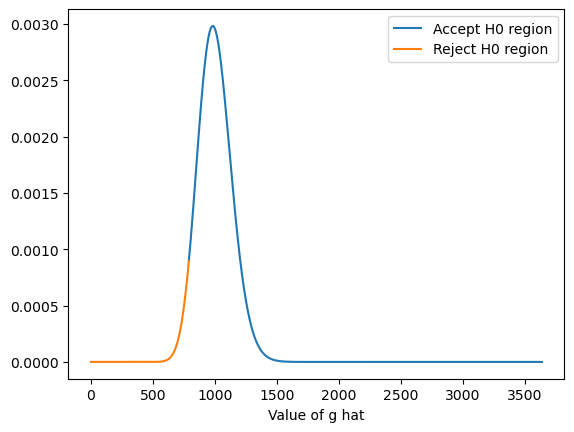

In [10]:
n = costs.size

accept_x = np.linspace(c/n, 2*10**5/n, 100000)
reject_x = np.linspace(0, c/n, 100000) 
accept_y = ss.gamma.pdf(accept_x, a=n, scale=(1/(n*testing_threshold)))
reject_y = ss.gamma.pdf(reject_x, a=n, scale=(1/(n*testing_threshold)))
plt.plot(accept_x, accept_y, label = "Accept H0 region")
plt.plot(reject_x, reject_y, label = "Reject H0 region")
plt.xlabel('Value of g hat')
plt.legend()
plt.show()

### Question 5

There is a type-II error when $S > Q(\alpha)$ with $\theta \geq 10^{-9}$, which means $\Beta(\theta)=\mathbb{P}_{\theta}(S > Q(\alpha))$. The power is then $1-\Beta(\theta)=1-\mathbb{P}_{\theta}(S > Q(\alpha))=\mathbb{P}_{\theta}(S < Q(\alpha))$.

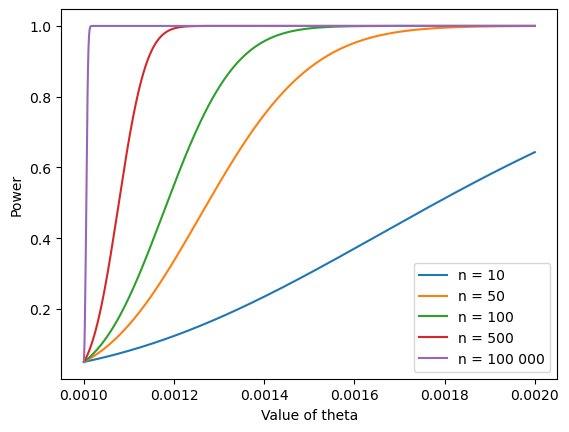

In [11]:
# get the power of the test
def test_power(theta, n, c):
    return ss.gamma.cdf(c, a=n, scale=(1/theta))

# get Q(alpha), alpha=5%, theta = 10^-9
def c(n):
    return ss.gamma.ppf(q=0.05, a=n, scale=(1/testing_threshold))

hypothesis_1 = np.linspace(testing_threshold, 2*testing_threshold , 1000)
n = 10
plt.plot(hypothesis_1, test_power(hypothesis_1, n, c(n)), label="n = 10")
n = 50
plt.plot(hypothesis_1, test_power(hypothesis_1, n, c(n)), label="n = 50")
n = 100
plt.plot(hypothesis_1, test_power(hypothesis_1, n, c(n)), label="n = 100")
n = 500
plt.plot(hypothesis_1, test_power(hypothesis_1, n, c(n)), label="n = 500")
n = 100000
plt.plot(hypothesis_1, test_power(hypothesis_1, n, c(n)), label="n = 100 000")
plt.legend()
plt.xlabel("Value of theta")
plt.ylabel("Power")
plt.show()

We observe that the higher the n is, the higher the power is for all $\theta$, which is quite intuitive since the more samples we have, the better the test is.

### Question 6

By the central limit theorem we have that $\frac{1}{n}\sum_{i=1}^n X_i \approx \mathcal{N}\left(\mathbb{E}(X_1),\frac{\mathrm{var}(X_1)}{n}\right)$ 

Here : $\mathrm{var}(X_1) = \frac{1}{\theta^2}$ and $\mathbb{E}(X_1) = \frac{1}{\theta}$

Thus, we can approximate $\hat{g}$ with $Z \sim \mathcal{N}\left(\frac{1}{\theta},\frac{1}{n\theta^2}\right)$

Let's find a new test using this approximation. The likelihood ratio hasn't changed, so we still use a test of the form :
$$\delta(x) = \begin{cases} 1 &\text{if } \hat{g}(X) < c \\ 0 &\text{else} \end{cases}$$

Then we want $c$ such that $\sup_{\theta \in \Theta_0} \mathbb{P}_{\theta}(Z < c) = \alpha$

Since $Z$ is Gaussian of mean $\frac{1}{\theta}$, we have $\sup_{\theta \in \Theta_0} \mathbb{P}_{\theta}(Z < c) = \sup_{\theta < 10^{-9}}\mathbb{P}_{\theta}(Z < c) = \mathbb{P}_{\theta= 10^{-9}}(Z < c)$

Let $Q$ denote the quartile function of $Z \sim \mathcal{N}\left(\frac{1}{\theta},\frac{1}{n\theta^2}\right)$ where $\theta = 10^{-9}$ 

Then $c = Q(\alpha)$

Let's compute this $c$

In [12]:
c = ss.norm.ppf(0.05, 1/testing_threshold, 1/(costs.size**(1/2)*testing_threshold))
print(f'We now have c = {c}')

We now have c = 778.2079821874304


We compare that with $\hat{g}(X)$ :

In [13]:
empirical_mean = costs.mean()
print(f'The estimated mean is {empirical_mean}')
if empirical_median < c :
    print('Reject H_0')
else : 
    print('Accept H_0')

The estimated mean is 726.3363636363637
Reject H_0


With this new test, we still reject H_0, and can affirm that the average cost is below 1 million dollars.